<a href="https://colab.research.google.com/github/Rashimanish/Flight_App/blob/main/Data_Collection/2022_FLIGHTDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_1_JAN.csv
Loaded file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_1_JAN.csv, number of rows: 12836
Loading file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_2_FEB.csv
Loaded file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_2_FEB.csv, number of rows: 21551
Loading file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_3_MAR.csv
Loaded file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_3_MAR.csv, number of rows: 6513
Loading file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_4_APR.csv
Loaded file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_4_APR.csv, number of rows: 1279
Loading file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_5_MAY.csv
Loaded file: /content/Data/On_Time_Reporting_Carrier_On_Time_Performance_2022_5_MAY.csv, number of rows: 1825
Loa

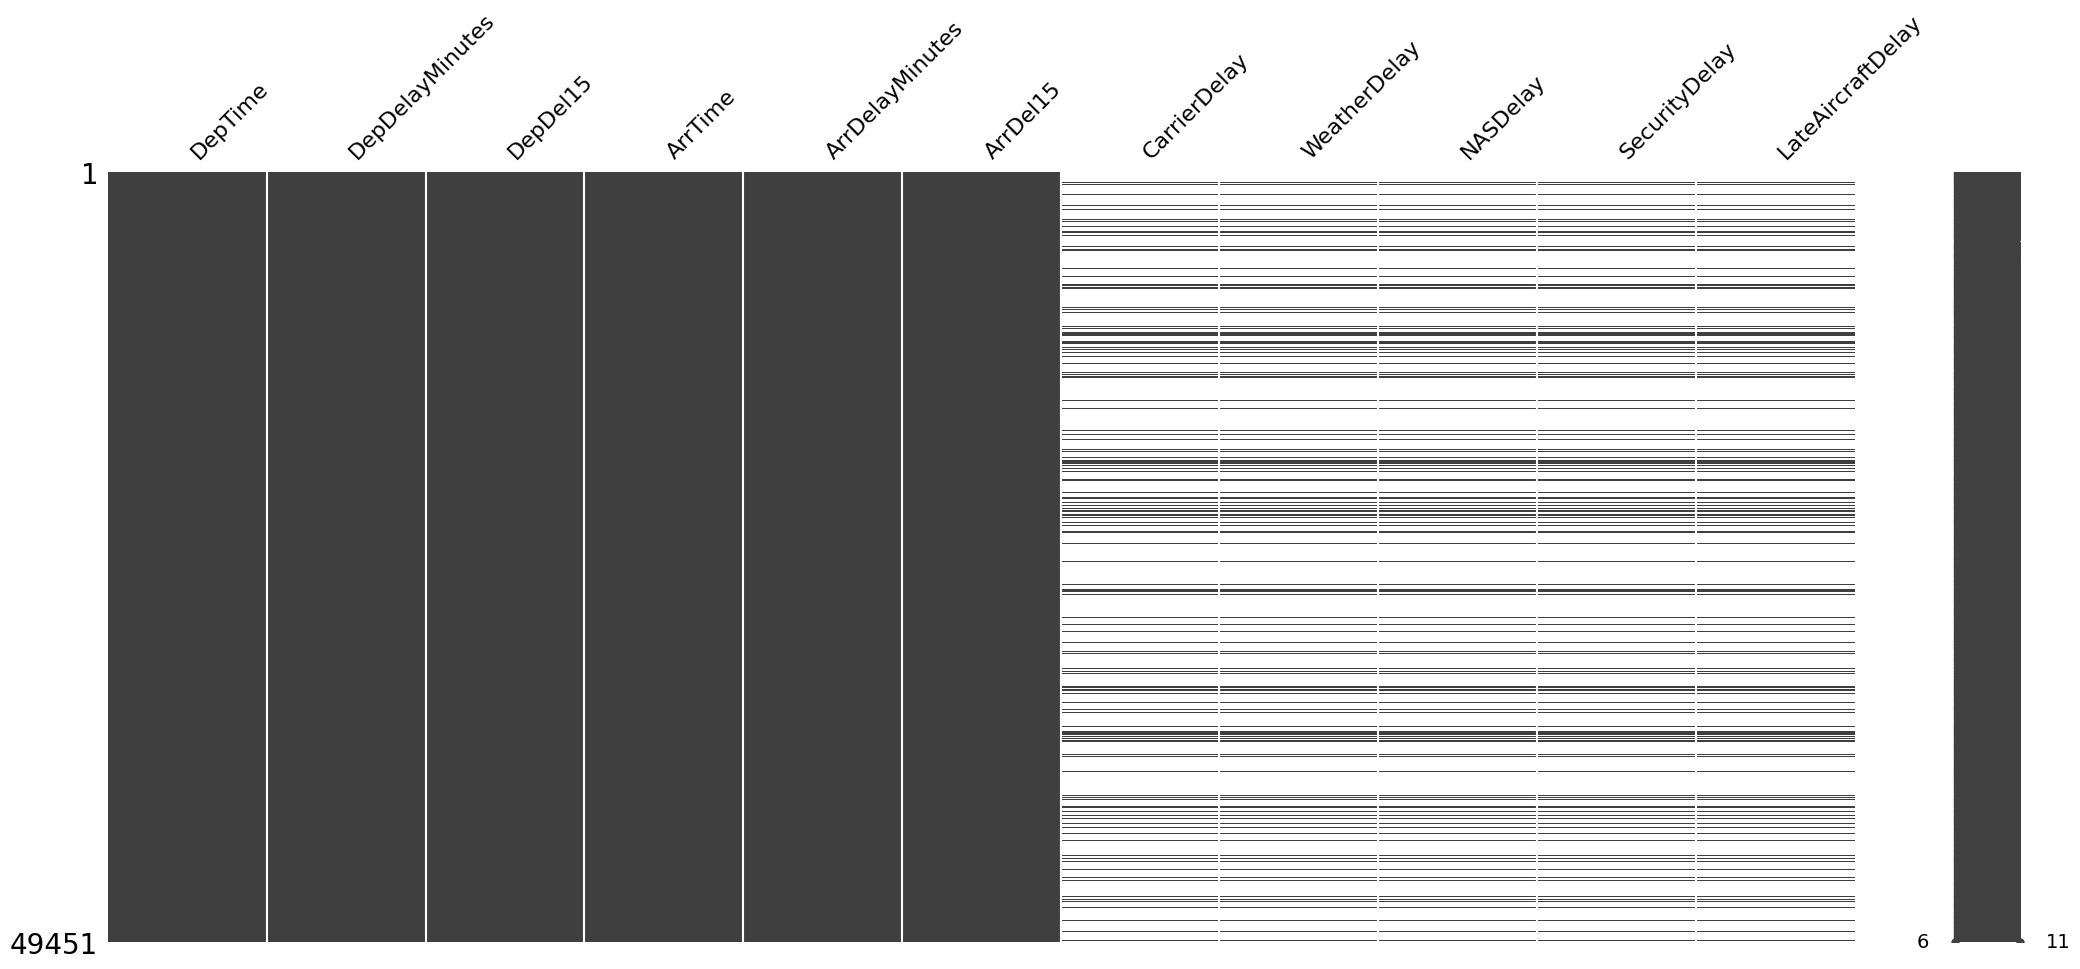

In [ ]:
import pandas as pd
import os
import missingno as msno


path = '/content/Data'
output_path = '/content/Data/flight_data_2022.csv'

# airports and fields to select
airports = ('ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO')
fields = [
    "Year",
    "Quarter",
    "Month",
    "DayofMonth",
    "FlightDate",
    "OriginAirportID",
    "Origin",
    "DestAirportID",
    "Dest",
    "CRSDepTime",
    "DepTime",
    "DepDelayMinutes",
    "DepDel15",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes",
    "ArrDel15",
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay"
]

# List of CSV files from January to December 2023
csv_files = [f'{path}/On_Time_Reporting_Carrier_On_Time_Performance_2022_{month}.csv' for month in ['1_JAN', '2_FEB', '3_MAR', '4_APR', '5_MAY', '6_JUN', '7_JUL', '8_AUG', '9_SEP', '10_OCT', '11_NOV', '12_DEC']]

# Create a list to store DataFrames
df_list = []

for file in csv_files:
    if os.path.exists(file):
        try:
            print(f"Loading file: {file}")

            df = pd.read_csv(file, usecols=fields, engine='python', on_bad_lines='skip')

            df = df[df["Origin"].isin(airports)]
            df = df[df["Dest"].isin(airports)]

            df_list.append(df)
            print(f"Loaded file: {file}, number of rows: {len(df)}")
        except pd.errors.ParserError as e:
            print(f"ParserError for file {file}: {e}")
    else:
        print(f"File {file} does not exist")

# Concatenate all DataFrames
merged_df = pd.concat(df_list, ignore_index=True)

# Display missing values for specific columns before dropping rows
print("Missing values before dropping rows:")
print(merged_df[['DepTime', 'DepDelayMinutes', 'DepDel15', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].isnull().sum())

# Drop rows with any missing values in the specified columns
merged_df = merged_df.dropna(subset=['DepTime', 'DepDelayMinutes', 'DepDel15', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15'])

# Display missing values for specific columns after dropping rows
print("\nMissing values after dropping rows:")
print(merged_df[['DepTime', 'DepDelayMinutes', 'DepDel15', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].isnull().sum())

# Visualize missing data
msno.matrix(merged_df[['DepTime', 'DepDelayMinutes', 'DepDel15', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']])

# Save the cleaned DataFrame to a CSV file
merged_df.to_csv(output_path, index=False)

# Display the first few rows of the cleaned DataFrame
print(merged_df.head())

# Display the number of rows and columns in the DataFrame
print("\nNumber of rows and columns in the DataFrame:")
print(merged_df.shape)

# Display info about the DataFrame
print("\nDataFrame info:")
print(merged_df.info())

# Display descriptive statistics of the DataFrame
print("\nDataFrame descriptive statistics:")
print(merged_df.describe())
